# Logistic Regression Proyect
## Table of contents
### Explore Data Analysis (EDA)

* [0. Problem Statement](#co)
* [1. Importing libraries](#c1)
* [2. Data Collection](#c2)
* [3. Exploration and Data Cleaning](#c3)
  * [3.1 Drop Duplicate Information](#c3-1)
  * [3.2 Drop Irrelevant Information](#c3-2)
* [4. Univariate Analysis](#c4)
  * [4.1 Dividing our dataset into categorical and numerical](#c4-1)
  * [4.2 Numerical Variable Analysis](#c4-2)

## 0. Problem Statement <a id='c0'></a>

The objective of this exercise is to conduct an in-depth EDA analysis and develop a predictive tree-decision model to determine if an indivdual based on health data will develop diabetes or not.

## 1. Importing libraries <a id='c1'></a>

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import json
import warnings
import pickle
from pickle import dump
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def warn(*args, **kwargs):
    pass
warnings.warn = warn
warnings.filterwarnings("ignore", category=FutureWarning)
pd.set_option('display.max_columns', None)

## 2. Data Collection <a id='c2'></a>

In [6]:
URL = 'https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv'

def get_data(URL:str) -> pd.DataFrame:
    total_data = pd.read_csv(URL, sep=',')
    total_data.head()
    return total_data

get_data(URL)
total_data = get_data(URL)

## 3. Exploration and Data Cleaning <a id='c3'></a>

#### 3.1 Drop Duplicate Information <a id='c3-1'></a>

In this case, we don't delete any row beacause there is no duplicated data

In [7]:
total_data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

#### 3.2 Drop Irrelevant Information <a id='c3-2'></a>

Since al data is relevant, we don't delete any column

## 4. Univariate Analysis <a id='c4'></a>

### 4.1 Dividing our dataset into categorical and numerical <a id='c4-1'></a>

We don't have any categorical variables in this dataset, so we will only work with numerical variables.

In [9]:
numerical_variables = total_data.select_dtypes(include=['number']).columns.tolist()
print("Numerical Variables:", numerical_variables)

categorical_variables = total_data.select_dtypes(include=['object', 'category']).columns.tolist()
print("Categorical Variables:", categorical_variables)

print(total_data.dtypes)

Numerical Variables: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
Categorical Variables: []
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


### 4.2 Numerical Variable Analysis <a id='c4-2'></a>

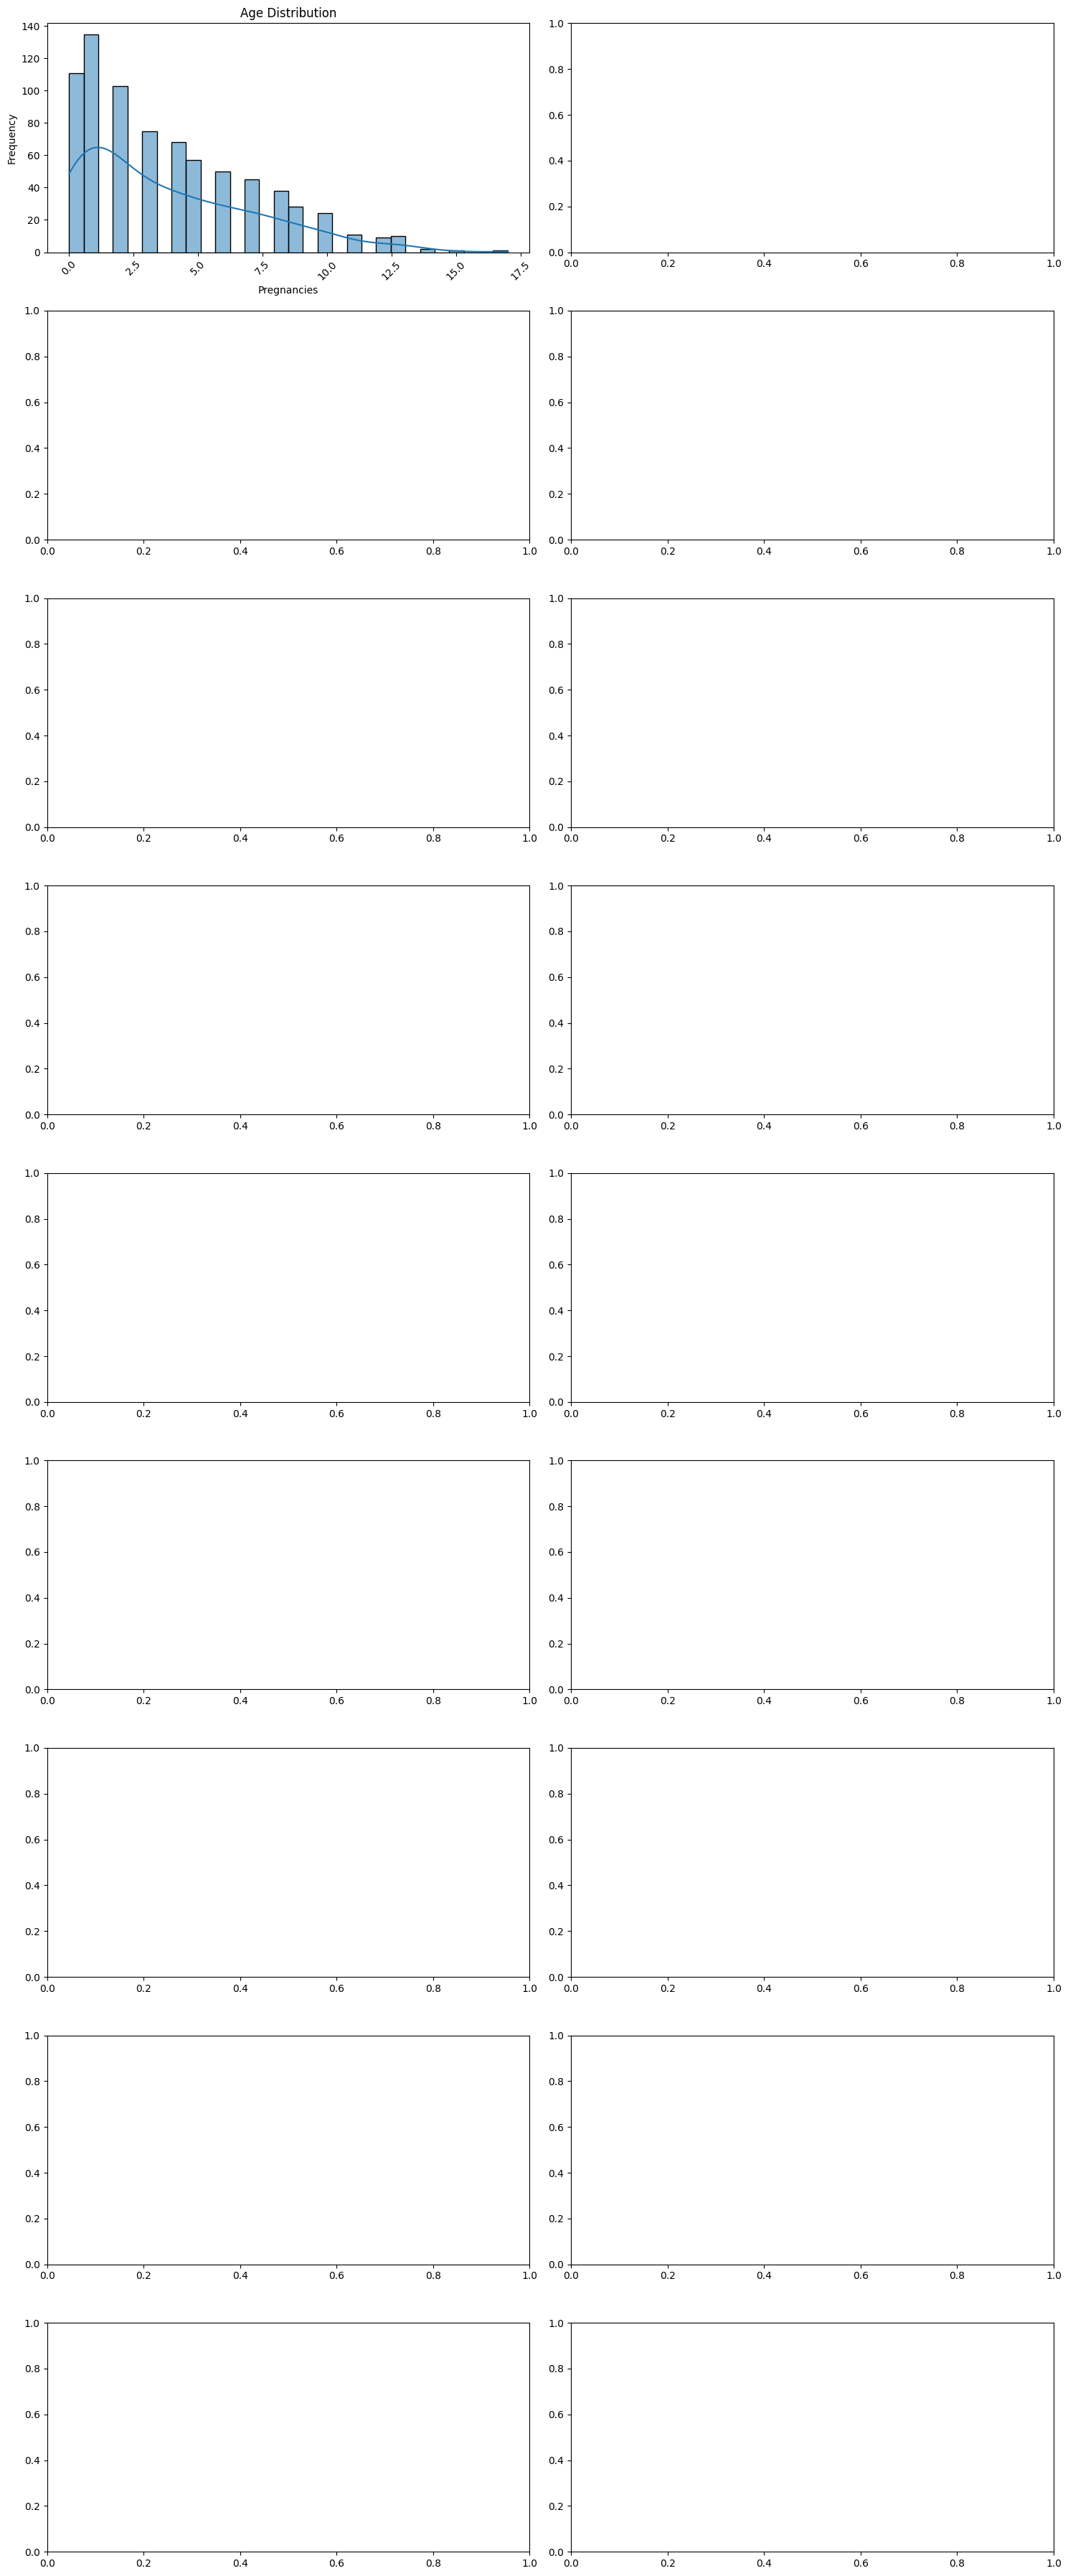

In [19]:
fig, axes = plt.subplots(
    nrows=len(numerical_variables),
    ncols=2,
    figsize=(15, 4 * len(numerical_variables)), # Ajustar el tamaño total de la figura
)

sns.histplot(
    data=total_data, x="Pregnancies", kde=True, bins=30, ax=axes[0, 0], palette="viridis"
)
axes[0, 0].set_title("Age Distribution", fontsize=12)
axes[0, 0].set_ylabel("Frequency", fontsize=10)
axes[0, 0].tick_params(axis="x", rotation=45)

plt.tight_layout()
plt.show()